In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('/content/v2.csv')
df.head(3)

<ipython-input-2-454ba8d06f9f>:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/v2.csv')


,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
0,1,0.0,2017-12-22 18:43:05,10c0f8e00448fa18c80515d30000000000000000000000...,24.2612,0.0,66.0,0.0,28.6275,40.0,97.0,0.0,0.0,1010.75,23.0,0.0,0.0
1,1,0.0,2017-12-22 18:43:06,1138f8c804780a1ebdf718bcf919d10617c8e301b31017...,23.15,0.0,66.0,0.0,33.7255,40.0,98.0,0.0,0.0,815.5,21.0,0.0,0.0
2,1,0.0,2017-12-22 18:43:07,10f0f89804480612c30010c30714ce0520b7f41dbdf118...,18.7052,0.0,66.0,0.0,43.1373,40.0,98.0,0.0,0.0,862.25,17.0,0.0,0.0


In [3]:
df.isna().sum()

,0
tripID,0
deviceID,0
timeStamp,0
accData,0
gps_speed,0
battery,0
cTemp,0
dtc,0
eLoad,0
iat,0


In [20]:
df.drop(columns=['tripID','deviceID','accData','battery','dtc','tAdv','imap','maf'],inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120272 entries, 0 to 3120271
Data columns (total 17 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tripID     object
 1   deviceID   object
 2   timeStamp  object
 3   accData    object
 4   gps_speed  object
 5   battery    object
 6   cTemp      object
 7   dtc        object
 8   eLoad      object
 9   iat        object
 10  imap       object
 11  kpl        object
 12  maf        object
 13  rpm        object
 14  speed      object
 15  tAdv       object
 16  tPos       object
dtypes: object(17)
memory usage: 404.7+ MB


In [5]:
df.shape


(3120272, 17)

In [8]:
df = df[(df.iloc[:, 1:] != 0).any(axis=1)]


In [7]:
columns_to_check = ['gps_speed', 'rpm', 'tPos', 'eLoad']

for column in columns_to_check:
    df[column] = pd.to_numeric(df[column], errors='coerce').round(2)

print(df[columns_to_check].head())


   gps_speed      rpm  tPos  eLoad
0      24.26  1010.75   0.0  28.63
1      23.15   815.50   0.0  33.73
2      18.71   862.25   0.0  43.14
3      16.48   817.00   0.0  41.57
4      17.41   804.25   0.0  43.14


In [9]:
df.head(5)

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
0,1,0.0,2017-12-22 18:43:05,10c0f8e00448fa18c80515d30000000000000000000000...,24.26,0.0,66.0,0.0,28.63,40.0,97.0,0.0,0.0,1010.75,23.0,0.0,0.0
1,1,0.0,2017-12-22 18:43:06,1138f8c804780a1ebdf718bcf919d10617c8e301b31017...,23.15,0.0,66.0,0.0,33.73,40.0,98.0,0.0,0.0,815.50,21.0,0.0,0.0
2,1,0.0,2017-12-22 18:43:07,10f0f89804480612c30010c30714ce0520b7f41dbdf118...,18.71,0.0,66.0,0.0,43.14,40.0,98.0,0.0,0.0,862.25,17.0,0.0,0.0
3,1,0.0,2017-12-22 18:43:08,10d0f84804480d15bd0210c9f822c80017caf81ccd0517...,16.48,0.0,66.0,0.0,41.57,40.0,97.0,0.0,0.0,817.00,17.0,0.0,0.0
4,1,0.0,2017-12-22 18:43:09,1090f8c80480041dc9081cc50815c60511c60112c40514...,17.41,0.0,66.0,0.0,43.14,40.0,97.0,0.0,0.0,804.25,15.0,0.0,0.0


In [10]:
df.isna().sum()

,0
tripID,0
deviceID,0
timeStamp,0
accData,0
gps_speed,32
battery,0
cTemp,0
dtc,0
eLoad,32
iat,0


In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

,0
tripID,0
deviceID,0
timeStamp,0
accData,0
gps_speed,0
battery,0
cTemp,0
dtc,0
eLoad,0
iat,0


**Outlier Detection and removal**

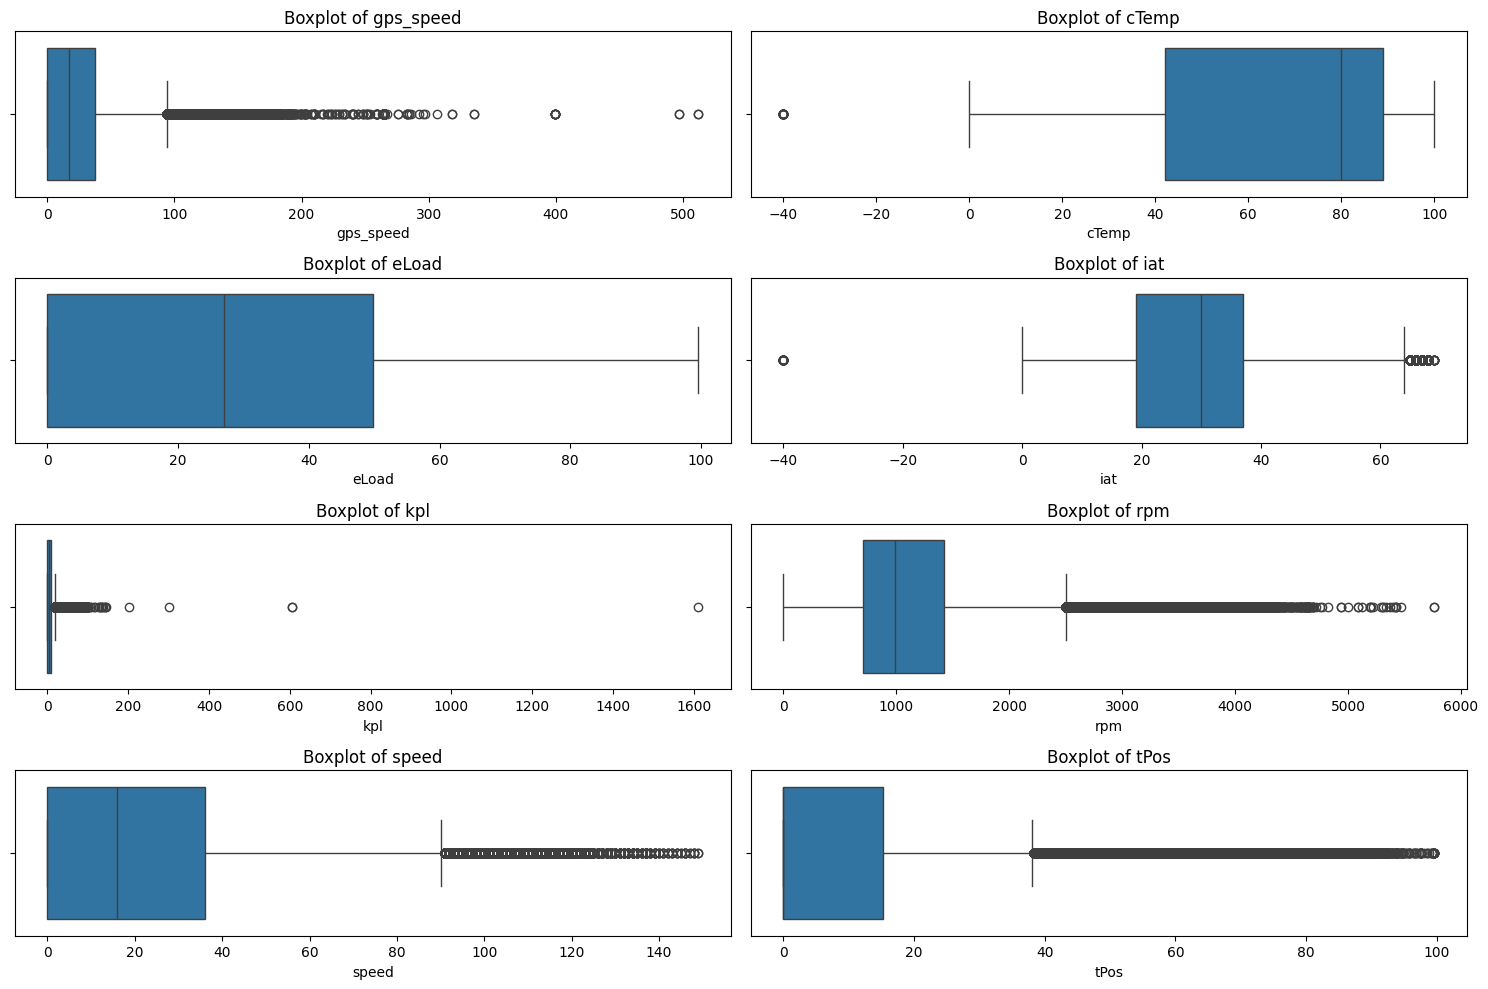

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['gps_speed', 'cTemp', 'eLoad', 'iat', 'kpl', 'rpm', 'speed', 'tPos']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [14]:

for column in columns_to_check:
    df[column] = pd.to_numeric(df[column], errors='coerce')


df = df.dropna().reset_index(drop=True)


In [15]:

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(f"Dataset size after removing outliers: {df.shape}")


Dataset size after removing outliers: (2571808, 17)


In [17]:

from sklearn.preprocessing import MinMaxScaler


# df = pd.read_csv('/content/v2_final.csv')


# df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%d-%m-%Y %H:%M')


def calculate_score(row):
    score = 10.0


    rpm = row['rpm']
    if rpm > 2000:
        score -= 2.0
    elif rpm > 1900:
        score -= 1.8
    elif rpm > 1800:
        score -= 1.6
    elif rpm > 1700:
        score -= 1.4
    elif rpm > 1600:
        score -= 1.2
    elif rpm > 1500:
        score -= 1.0
    elif rpm > 1400:
        score -= 0.8
    elif rpm > 1300:
        score -= 0.6
    elif rpm > 1200:
        score -= 0.4
    elif rpm > 1100:
        score -= 0.2


    eLoad = row['eLoad']
    if eLoad > 80:
        score -= 2.0
    elif eLoad > 75:
        score -= 1.8
    elif eLoad > 70:
        score -= 1.6
    elif eLoad > 65:
        score -= 1.4
    elif eLoad > 60:
        score -= 1.2
    elif eLoad > 55:
        score -= 1.0
    elif eLoad > 50:
        score -= 0.8
    elif eLoad > 45:
        score -= 0.6
    elif eLoad > 40:
        score -= 0.4
    elif eLoad > 35:
        score -= 0.2


    gps_speed = row['gps_speed']
    if gps_speed > 90:
        score -= 2.0
    elif gps_speed > 80:
        score -= 1.8
    elif gps_speed > 70:
        score -= 1.6
    elif gps_speed > 60:
        score -= 1.4
    elif gps_speed > 50:
        score -= 1.2
    elif gps_speed > 40:
        score -= 1.0
    elif gps_speed > 30:
        score -= 0.8
    elif gps_speed > 20:
        score -= 0.6
    elif gps_speed > 10:
        score -= 0.4
    elif gps_speed > 5:
        score -= 0.2

    tPos = row['tPos']
    if tPos > 80:
        score -= 1.5
    elif tPos > 60:
        score -= 1.2
    elif tPos > 40:
        score -= 1.0
    elif tPos > 20:
        score -= 0.5


    iat = row['iat']
    if iat > 50:
        score -= 0.5
    elif iat < 10:
        score -= 0.5


    kpl = row['kpl']
    if kpl < 5:
        score -= 2.0
    elif kpl < 10:
        score -= 1.0

    return max(score, 0)


df['driving_score'] = df.apply(calculate_score, axis=1)

print(df[['gps_speed', 'rpm', 'speed', 'eLoad', 'tPos', 'driving_score']])

print(df['driving_score'].unique())


         gps_speed      rpm  speed  eLoad  tPos  driving_score
0            24.26  1010.75   23.0  28.63   0.0            7.4
1            23.15   815.50   21.0  33.73   0.0            7.4
2            18.71   862.25   17.0  43.14   0.0            7.2
3            16.48   817.00   17.0  41.57   0.0            7.2
4            17.41   804.25   15.0  43.14   0.0            7.2
...            ...      ...    ...    ...   ...            ...
3120235       5.00     0.00    0.0   0.00   0.0            7.5
3120236       5.00     0.00    0.0   0.00   0.0            7.5
3120237       5.00     0.00    0.0   0.00   0.0            7.5
3120238       5.00     0.00    0.0   0.00   0.0            7.5
3120239       5.00     0.00    0.0   0.00   0.0            7.5

[2571808 rows x 6 columns]
[ 7.4  7.2  5.6  6.2  6.   5.8  6.2  7.2  6.4  7.   6.8  6.6  6.6  6.4
  6.8  6.   7.   5.4  4.8  6.   5.4  7.6  5.8  7.6  4.2  5.2  5.6  5.4
  4.6  6.   5.8  5.   5.4  5.2  5.   5.   4.8  5.8  7.8  8.   7.5  4.4
  3

In [21]:
df.head(10)

,timeStamp,gps_speed,cTemp,eLoad,iat,kpl,rpm,speed,tPos,driving_score
0,2017-12-22 18:43:05,24.26,66.0,28.63,40.0,0.0,1010.75,23.0,0.0,7.4
1,2017-12-22 18:43:06,23.15,66.0,33.73,40.0,0.0,815.50,21.0,0.0,7.4
2,2017-12-22 18:43:07,18.71,66.0,43.14,40.0,0.0,862.25,17.0,0.0,7.2
3,2017-12-22 18:43:08,16.48,66.0,41.57,40.0,0.0,817.00,17.0,0.0,7.2
4,2017-12-22 18:43:09,17.41,66.0,43.14,40.0,0.0,804.25,15.0,0.0,7.2
5,2017-12-22 18:43:10,15.00,66.0,43.14,40.0,0.0,831.50,12.0,0.0,7.2
6,2017-12-22 18:43:11,11.67,66.0,41.18,40.0,0.0,878.25,11.0,0.0,7.2
7,2017-12-22 18:43:12,10.00,66.0,41.96,40.0,0.0,818.00,11.0,0.0,7.4
8,2017-12-22 18:43:13,12.22,66.0,85.10,40.0,0.0,783.25,11.0,0.0,5.6
9,2017-12-22 18:43:14,12.41,66.0,68.24,40.0,0.0,783.25,12.0,0.0,6.2


final check

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df[['gps_speed', 'cTemp', 'eLoad', 'iat', 'kpl', 'rpm', 'speed', 'tPos']]
y = df['driving_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for regularized regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1)
lasso_model = Lasso(alpha=100)

# Train models
linear_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_test_pred_linear = linear_model.predict(X_test_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate models (MSE)
linear_mse = mean_squared_error(y_test, y_test_pred_linear)
ridge_mse = mean_squared_error(y_test, y_test_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_test_pred_lasso)

# Display MSE results
print("Multi-Linear Regression MSE:", linear_mse)
print("Ridge Regression (L2) MSE:", ridge_mse)
print("Lasso Regression (L1) MSE:", lasso_mse)

Multi-Linear Regression MSE: 0.2806025061245193
Ridge Regression (L2) MSE: 0.2806025117173817
Lasso Regression (L1) MSE: 1.3563428947527028


In [39]:
# Load trip data from CSV file
trip_data = pd.read_csv("/content/trip-data.csv")  # Replace with your trip data filename

# Clean the trip data by rounding and removing all-zero rows
trip_data = trip_data.round(2)
trip_data = trip_data[~(trip_data[['gps_speed', 'cTemp', 'eLoad', 'iat', 'kpl', 'rpm', 'speed', 'tPos']] == 0).all(axis=1)]

# Extract features for prediction
X_trip = trip_data[['gps_speed', 'cTemp', 'eLoad', 'iat', 'kpl', 'rpm', 'speed', 'tPos']]
X_trip_scaled = scaler.transform(X_trip)

# Make predictions on trip data
trip_predictions = ridge_model.predict(X_trip_scaled)

# Calculate the overall driving score by averaging predictions
overall_driving_score = np.mean(trip_predictions)

# Display individual predictions and the overall score
# print("\nPredicted Driving Scores for Each Trip Entry:")
# for i, score in enumerate(trip_predictions):
#     input_values = X_trip.iloc[i].values
#     print(f"Input Values (gps_speed, cTemp, eLoad, iat, kpl, rpm, speed, tPos): {input_values}")
#     print(f"Predicted Score: {score:.2f}\n")

print("Overall Driving Score :", overall_driving_score)

Overall Driving Score : 6.4913967819319796


In [ ]:
import pickle

# Assuming 'model' is your trained model or data object
with open('model.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)


: 